# Tutorial 1: Determinant and inverse

In [1]:
# Load packages:

# this package allows to work efficiently with arrays
import numpy as np
# this package is used to draw graphs
import matplotlib.pyplot as plt

In this implementation exercise, a naive method based on Laplace expansion is tested for the computation of determinants and inverses of large matrices. The objective is to observe how expensive such a method is. The next lectures and tutorials present smarter alternatives for such computations.

---

## Determinant of a $2\times2$ matrix

1) a) Recall the formula of the determinant of a $2\times2$ matrix 

$$A = \left(\begin{array}{cc} a & b \\ c & d\end{array}\right).$$ 

b) For the test below, we use the matrix

$$B = \left(\begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array}\right).$$ 

Compute $det(B)$.

c) How many operations are performed?

**Answer:**

a) $$\det(A) = \sum_{P\in\mathcal{G}_N}\epsilon(P)\prod_{i=1}^N A_{i,p_i},\ \ p=P(1,2,\ldots,N)^T$$

b) -2

c) The number of operations performed is $3$. Those are the two multiplications and the subtraction


2) a) Implement a function that takes a $2\times2$ matrix in entry and returns its determinant using this formula. 

b) Test your algorithm on the matrix $B$ and compare it with the result obtained in 1.b. 

In [2]:
def det_22(A):
    """
    Compute the determinant of a 2x2 matrix
    ----------   
    parameters:
    A : matrix (numpy array of size 2,2)
    
    returns:
    det : determinant of A
    """
    
    ### write your formula here
    det = 0
    det = A[0,0]*A[1,1]-A[0,1]*A[1,0]
    ###

    
    return det

In [ ]:
#Test the function det_22 with the following matrix
B     = np.array([[1,2],[3,4]])

det_B = det_22(B)

print("det(B) = ", det_B)

---

## Determinant of a 3$\times$3 matrix

3) a) Using Laplace expansion with respect to the first row, recall the determinant of the matrix 

$$ A = \left(\begin{array}{ccc} a & b & c \\ d & e & f \\ g & h & i\end{array}\right), $$

as a function of the vector $(a,b,c)$ and of determinants of $2\times2$ matrices.

b) For the test below, we use the matrix 

$$ B = \left(\begin{array}{ccc} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{array}\right).$$

Compute $det(B)$.

**Answer:**

a) $$\det(A) = a\det\left(\begin{array}{cc} e & f \\ h & i\end{array}\right) - b\det\left(\begin{array}{cc} d & f \\ g & i\end{array}\right) + c\det\left(\begin{array}{cc} d & e \\ g & h\end{array}\right)$$

b)

4) How many operations are required for: 
- the computation of the full determinant, knowing the vector $(a,b,c)$ and all the determinants of the $2\times2$ matrices 
- the computation of all the determinants of the $2\times2$ matrices 
- then the computation of the full determinant, knowing only $A$
    
    
    We have that each determinant of $2\times2$ matrices is computed in $3$ operations. So we have $3$ operations for each of the $3$ determinants. So we have $9$ operations simply for the determinants. Then, we multiply each determinant by the corresponding coefficient and add them. So we have $3$ additions and $3$ multiplications. So we have $15$ operations in total.

**Answer:**

5) a) Implement a function that takes such a $3\times3$ matrix in entry and returns its determinant using this formula. 

***Indications:***
- You should use the function "det_22" you coded before.</li>
- You can use the function "delete" of numpy: 
    - delete(B, j, 0) returns the matrix B without the $j$-th row, 
    - delete(B, j, 1) returns the matrix B without its j-th column.

b) Test your algorithm on the matrix $B$ and compare it with the result obtained in 3.b. 

In [3]:
#Example of use of the function delete
B     = np.array([[1,2,3],[4,5,6],[7,8,9]])

print("B: \n", B,"\n")
print("delete(B, 1, 0):\n ", np.delete(B, 1, 0), "\n")
print("delete(B, 1, 1):\n", np.delete(B, 1, 1), "\n")

B: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

delete(B, 1, 0):
  [[1 2 3]
 [7 8 9]] 

delete(B, 1, 1):
 [[1 3]
 [4 6]
 [7 9]] 



In [5]:
def det_33(A):
    """
    Compute the determinant of a 3x3 matrix
    ----------   
    parameters:
    A : matrix (numpy array of size 3,3)
    
    returns:
    det : determinant of A
    """
    
    ### write your formula here
    det = 0
    det = A[0,0]*det_22(np.delete(A,0,0)) - A[0,1]*det_22(np.delete(A,1,0)) + A[0,2]*det_22(np.delete(A,2,0))
    ###
    
    return det

In [6]:
#Test the function det_33
B     = np.array([[1,2,3],[4,5,6],[7,8,9]])

det_B = det_33(B)

print("det(B) = ", det_B)

det(B) =  0


---

## Determinant of a $N\times N$ matrix

**Important remark before starting:** 

In this section, we will implement a recursive algorithm, i.e. a function that calls itself in its definition. If possible, this type of algorithms should be avoided, because 
- It may create infinite loops if it is badly implemented (missing stopping criterium).
- It may fill the memory if the loop is too long. Especially, Python stores all the intermediate variables, and the storage increases very fast in the present algorithm.

The algorithm proposed here should break after few iterations, so <b>SAVE REGULARLY YOUR NOTEBOOK</b>.

6) Using again Laplace expansion with respect to the first row, recall the determinant of the matrix $A \in \mathbb{R}^{N\times N}$ as a function of the vector $V = (A_{1,i})_{i=1,\dots,N}$ and of determinants of smaller matrices of size $(N-1)\times(N-1)$. 

**Answer:** $\sum_{i=1}^N V_i \det\begin{bmatrix}
A_{2,1} & \cdots & A_{2,i-1} & A_{2,i+1} & \cdots & A_{2,N} \\
\vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
A_{N,1} & \cdots & A_{N,i-1} & A_{N,i+1} & \cdots & A_{N,N}
\end{bmatrix}$ 

7) a) How many operations are required for: 
- The computation of the full determinant, knowing the vector $V$ and all the determinants of the smaller matrices as a function $N$.
- then for the computation of each determinant of the smaller matrices of size $(N-1)\times(N-1)$ in terms of the $N-2$ step.

b) How many determinants of size $(N-1)\times(N-1)$ are necessary? Then of size $(N-2)\times(N-2)$? </li>

c) Using a similar iterative sequence, write a formula for the quantity $Q_N$ of operations required for the computation of a determinant of a $N\times N$ matrix as a function of $Q_{N-1}$ and $N$. Compare this sequence to the sequence $N!$.</li>

**Answer:**

a) 

b) 

c) 

8) a) Save your notebook, and save it regularly while debugging.

b) In the test below, we use the matrix 

$$ B = \left( \begin{array}{cccc} 1 & 2 & 3 & 4 \\ 5 & 6 & 7 & 8 \\ 9 & 10 & 11 & 12 \\ 13 & 14 & 15 & 16 \end{array}\right).$$

Compute $det(B)$. 

c) Using Laplace formula with respect to the first row of $A$, implement a function that takes a matrix $A\in\mathbb{R}^{N\times N}$, and the size $N$ in entry and returns its determinant. 

***Indications:***
- This algorithm should exploit the functions 
    - "det_22" if $N=2$,
    - or "det_NN" itself with a new $N'=N-1$ if $N>2$ (recursive definition)
- You may use the function "delete" of numpy.

d) Test your algorithm on the matrix $B$ and compare it with the result obtained in 8.b. 

In [12]:
def det_NN(A, N):
    """
    Compute the determinant of a NxN matrix
    ----------   
    parameters:
    A : matrix (numpy array of size N,N)
    N : size of the matrix
    
    returns:
    det : determinant of A
    """
    
    ### modify this algorithm
    det = 0
    
    if(N==2):
        ### return the determinant of a 2x2 matrix
        det_22(A)
    else:       
        ### return the determinant of a NxN matrix using Laplace expansion        
        for i in range(N):
            det += (-1)**i*A[0,i]*det_NN(np.delete(A,i,0),N-1)
    ###    
    
    return det

In [13]:
#Test this function
B     = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])

det_B = det_NN(B, 4)

print("det(B) = ", det_B)

det(B) =  0


9) Now copy your algorithm. And add a counter of operations performed for the computation of the determinant. 

a) Test your algorithm with the provided $4\times4$ matrix and verify the obtained number of operations.

b) Test your algorithm with the identity matrices of size $N = 2,...,6$ and plot the number of operations as a function of $N$. 

c) Verify the formula of $Q_N$ found in 7.c.

In [14]:
def det_NN_count(A, N):
    """
    Compute the determinant of a NxN matrix
    ----------   
    parameters:
    A       : matrix (numpy array of size N,N)
    N       : size of the matrix
    counter : 
    
    returns:
    det     : determinant of A
    counter : number of operations performed in the algorithm
    """
    
    ### modify this algorithm
    det     = 0
    counter = 0
    
    if(N==2):
        ### return the determinant of a 2x2 matrix
        det_22(A)
        counter +=3
    else:       
        ### return the determinant of a NxN matrix using Laplace expansion        
        for i in range(N):
            det += (-1)**i*A[0,i]*det_NN(np.delete(A,i,0),N-1)

            if i!=0:
                counter+=(i-1)+1+1
            else:
                counter+=1+1+1

    
    return det, counter

In [15]:
#Test this function
B                 = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])

det_B, counter_op = det_NN_count(B, len(B))

print("det(B) = ", det_B)
print("number of operations = ", counter_op)

det(B) =  0
number of operations =  12


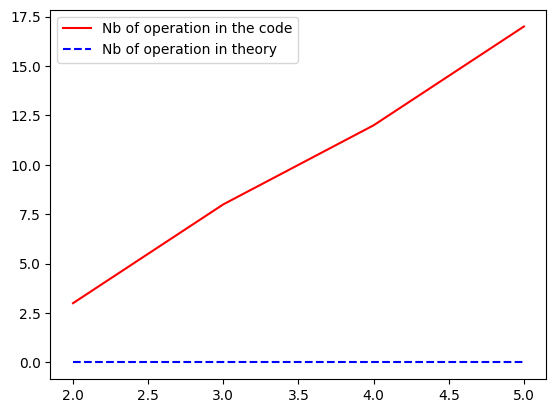

In [16]:
# maximum size of the matrix 
N     = 6

# number of operations (algo and theory)
c     = np.zeros(N-2)
c_ref = np.zeros(N-2)

# loop on the size of matrix
for i in range(2,N):
    # example of matrix of size i (only the size matters to compute the number of operations)
    B              = np.eye(i)
    
    # count the number of operation by the algorithm
    det_B, c[i-2]  = det_NN_count(B, i)
    # modify with the value found in 7.c (theory)
    c_ref[i-2]     = 0
        
        
# plot the number of operation as a function of N
plt.figure(1)
plt.plot( range(2,N),     c      , color='red',  label="Nb of operation in the code")
plt.plot( range(2,N), c_ref, '--', color='blue', label="Nb of operation in theory"  )
plt.legend()
plt.show()

10) a) <b>Save your notebook</b> before every run. 

b) Test again your algorithm with a $N\times N$ matrix with $N=15$.

c) Up to which $N$ is your code efficient? And for which $N$ is it impossible to use? 

**Answer:** 

---

## Computation of the inverse

**To go further:**

11) Recall Cramer's formula for the solution of the linear system $A V = b$. 


**Answer:** 

12) Implement an algorithm to solve a linear system $AV=b$ using the functions "det_NN", and test it with the matrix provided.

In [ ]:
def Cramer(A, b):
    """
    Solves the problem AV = b with Cramer's formula
    ----------   
    parameters:
    A       : matrix (numpy array of size N,N)
    b       : RHS vector (numpy array of size N)
    counter : 
    
    returns:
    V     : solution of the problem AV = b
    """
 
    ### Write your formula
    V = np.zeros(len(b))
    return V

In [ ]:
N      = 5

B      = np.ones((N,N)) + (N+2.) * np.eye(N)
B[0,0] = 0
b      = np.ones(N)
b[-1]  = 2
sol    = Cramer(B,b)

print("V  = ", sol)
print("AV = ", np.matmul(B,sol))

13) Count the number of operations required to compute this solution with Cramer's formula for different $N$. 